In [79]:
import pandas as pd
import json
import numpy as np
import operator
import matplotlib.pyplot as plt
from collections import Counter
import os
import time
import pickle
import networkx as nx
import string
import seaborn as sns
from random import sample

pd.options.mode.chained_assignment = None  # default='warn'
ROOT = os.path.dirname(os.getcwd())
ROOT = os.path.dirname(os.getcwd())
teams = pd.read_pickle(os.path.join(ROOT, 'processed_data', 'teams.pkl.gz'))
players = pd.read_pickle(os.path.join(ROOT, 'processed_data', 'players.pkl.gz'))

teams['officialName'] = teams['officialName'].apply(lambda s: ''.join([x for x in s if x.isalpha() or x in [' ', '.'] ]))

# Q1: How stationery are the basic team passing metrics from the player graphs?

We're trying to see if player metrics change game over game or if play styles are consistent according to our metrics

### $\mu$

In [80]:
df = pd.read_pickle(os.path.join(ROOT, 'intermediates', 'player_passing_networks_exploration.pkl.gz'))
df['mean_passes_players_norm'] = df['mean_passes_players']/df['w']
df['std_passes_players_norm'] = df['std_passes_players']/df['w']
#df = df.drop(columns=['mean_passes_players', 'std_passes_players'])
df['wyId'] = df.index.get_level_values(1)
df

w  mean_passes_players  std_passes_players  \
2499719 1609  606.0            84.285714           59.311989   
        1631  230.0            30.285714           16.559583   
2499720 1625  754.0           105.428571           73.886310   
        1651  184.0            24.428571           14.345808   
2499721 1610  516.0            77.230769           48.071395   
...             ...                  ...                 ...   
2576336 3315  337.0            46.571429           24.453140   
2576337 3164  446.0            66.615385           39.434626   
        3204  363.0            53.538462           23.564151   
2576338 3185  338.0            46.571429           18.756391   
        3193  532.0            73.714286           35.497407   

              mean_passes_players_norm  std_passes_players_norm  wyId  
2499719 1609                  0.139085                 0.097875  1609  
        1631                  0.131677                 0.071998  1631  
2499720 1625                  0.139826                 0.097992  1625  
        1651                  0.132764                 0.077966  1651  
2499721 1610                  0.149672                 0.093162  1610  
...                                ...                      ...   ...  
2576336 3315                  0.138194                 0.072561  3315  
2576337 3164                  0.149362                 0.088418  3164  
        3204                  0.147489                 0.064915  3204  
2576338 3185                  0.137785                 0.055492  3185  
        3193                  0.138561                 0.066724  3193  

[3652 rows x 6 columns]

In [81]:
df['index'] = df.index
df = df.merge(teams[['wyId', 'area.name', 'officialName']]).set_index('index')
df.index = pd.MultiIndex.from_tuples(df.index)
df = df.sort_index()
df

w  mean_passes_players  std_passes_players  \
2499719 1609  606.0            84.285714           59.311989   
        1631  230.0            30.285714           16.559583   
2499720 1625  754.0           105.428571           73.886310   
        1651  184.0            24.428571           14.345808   
2499721 1610  516.0            77.230769           48.071395   
...             ...                  ...                 ...   
2576336 3315  337.0            46.571429           24.453140   
2576337 3164  446.0            66.615385           39.434626   
        3204  363.0            53.538462           23.564151   
2576338 3185  338.0            46.571429           18.756391   
        3193  532.0            73.714286           35.497407   

              mean_passes_players_norm  std_passes_players_norm  wyId  \
2499719 1609                  0.139085                 0.097875  1609   
        1631                  0.131677                 0.071998  1631   
2499720 1625                  0.139826                 0.097992  1625   
        1651                  0.132764                 0.077966  1651   
2499721 1610                  0.149672                 0.093162  1610   
...                                ...                      ...   ...   
2576336 3315                  0.138194                 0.072561  3315   
2576337 3164                  0.149362                 0.088418  3164   
        3204                  0.147489                 0.064915  3204   
2576338 3185                  0.137785                 0.055492  3185   
        3193                  0.138561                 0.066724  3193   

             area.name                         officialName  
2499719 1609   England                           Arsenal FC  
        1631   England                    Leicester City FC  
2499720 1625   England                   Manchester City FC  
        1651   England             Brighton  Hove Albion FC  
2499721 1610   England                           Chelsea FC  
...                ...                                  ...  
2576336 3315     Italy                   US Sassuolo Calcio  
2576337 3164     Italy                         UC Sampdoria  
        3204     Italy  Societue Polisportiva Ars et Labor   
2576338 3185     Italy                            Torino FC  
        3193     Italy                            Genoa CFC  

[3652 rows x 8 columns]

<Figure size 1080x360 with 0 Axes>

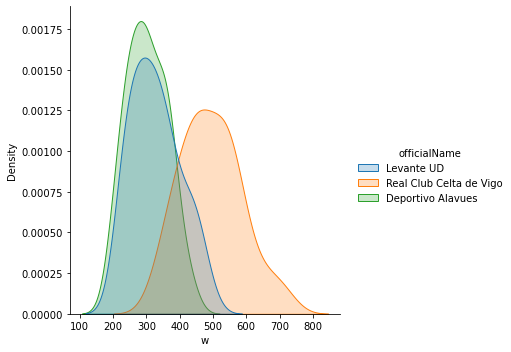

In [92]:
plt.figure(figsize=(15, 5))

subset = df.loc[(df['area.name']=='Spain')]
random_sample_teams = sample(list(subset.index.get_level_values(1).unique()), 3)
subset = subset.loc[subset.index.get_level_values(1).isin(random_sample_teams)]

sns.displot(subset,
            x="w", hue='officialName', kind="kde", fill=True)
plt.show()

<Figure size 1080x360 with 0 Axes>

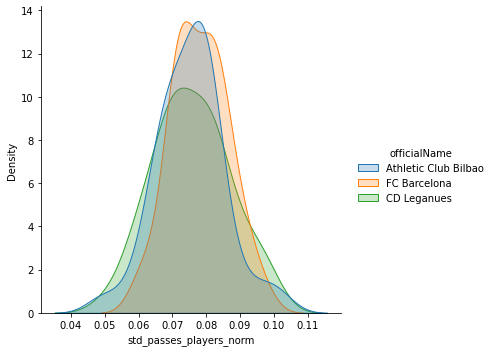

In [83]:
plt.figure(figsize=(15, 5))

subset = df.loc[(df['area.name']=='Spain')]
random_sample_teams = sample(list(subset.index.get_level_values(1).unique()), 3)
subset = subset.loc[subset.index.get_level_values(1).isin(random_sample_teams)]

sns.displot(subset,
            x="std_passes_players_norm", hue='officialName', kind="kde", fill=True)
plt.show()